# Fisher's Determinant Analysis on ... dataset 

# Linear discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes.

In [79]:
#import libraries

import os, sys 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis  

cf.go_offline()
%matplotlib inline
init_notebook_mode(connected = True)
notebook_colours=["plum","slateblue","navy","firebrick","darksalmon","slateblue","maroon","lightskyblue","blue","darkmagenta"]

In [234]:
df = pd.read_csv('heart.csv')

In [235]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [237]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [285]:
#define predictor and response variables

X = df.iloc[:, 0:12].values
y = df.iloc[:, 13].values
print(f'X shape is: {X.shape} \ny shape is: {y.shape}')

X shape is: (303, 12) 
y shape is: (303,)


In [286]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [287]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [288]:
X_train

array([[-0.37673825,  0.69617712,  1.04280096, ..., -0.90665505,
         1.0057096 ,  0.29573836],
       [ 0.9607286 ,  0.69617712, -0.9134613 , ...,  0.59444316,
         1.0057096 ,  2.31175763],
       [ 1.07218418,  0.69617712,  2.02093209, ...,  0.59444316,
        -0.6387615 , -0.71227127],
       ...,
       [ 0.1805396 , -1.43641607, -0.9134613 , ...,  0.67783751,
        -0.6387615 ,  1.303748  ],
       [ 1.40655089,  0.69617712, -0.9134613 , ..., -0.15610594,
        -0.6387615 ,  1.303748  ],
       [ 0.73781746,  0.69617712, -0.9134613 , ...,  2.09554137,
        -0.6387615 ,  0.29573836]])

In [252]:
# Applying LDA

lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [253]:
#Define method to evaluate model

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

In [254]:
#evaluate model

scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(round(np.mean(scores),ndigits=3)) 

0.819


In [255]:
print(scores)

[0.77419355 0.61290323 0.87096774 0.8        0.9        0.8
 0.76666667 0.86666667 0.86666667 0.83333333 0.83870968 0.77419355
 0.83870968 0.83333333 0.86666667 0.8        0.76666667 0.7
 0.9        0.93333333 0.80645161 0.80645161 0.90322581 0.76666667
 0.83333333 0.86666667 0.83333333 0.83333333 0.76666667 0.8       ]


In [256]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [257]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

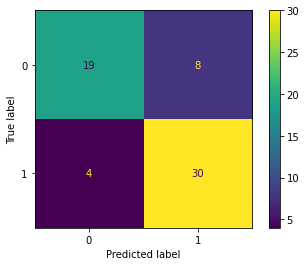

In [258]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)

In [259]:
# Accuracy score

print(accuracy_score(y_test,classifier.predict(X_test)))

0.8032786885245902


In [260]:
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


# LDA with KNN 

In [328]:
df = pd.read_csv('heart.csv').sample(frac=1)

In [329]:
data

,target,Alcohol,Malic_acid,Ash,Akcakinity,Magnesium,Total_pheonols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [330]:
# Split the descriptive and the target feature

X = data.iloc[:,1:12]
target = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.2,random_state=0) 

#  nu este st. test

In [331]:
# Standardize the data
# Train
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))
# Test
for col in X_test.columns:
    X_test[col] = StandardScaler().fit_transform(X_test[col].values.reshape(-1,1))

In [332]:
X_train

,Alcohol,Malic_acid,Ash,Akcakinity,Magnesium,Total_pheonols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue
161,0.876683,0.798429,0.644130,0.129743,0.488532,-0.703262,-1.428468,1.072457,-1.368203,0.351932,0.029017
92,-0.366591,-0.758130,-0.397799,0.333800,-1.413024,-1.441531,-0.502998,1.701100,0.023668,-0.841146,0.029017
94,-1.696894,-0.344248,-0.323375,-0.453279,-0.145320,1.249050,0.319642,-1.520697,-0.434631,-0.756829,0.901974
174,0.516134,1.383263,0.420859,1.004275,0.136392,-0.752480,-1.233091,0.522394,-0.332787,0.950579,-1.105828
24,0.640461,-0.506202,0.904612,0.129743,-0.286176,0.445157,0.679547,-0.656312,0.091564,-0.643002,0.727382
...,...,...,...,...,...,...,...,...,...,...,...
103,-1.448239,-0.587179,-1.811844,-0.016013,-0.990456,0.395939,-0.317904,0.050911,-0.315813,-1.258512,-0.058279
67,-0.764438,-1.082039,-1.662997,0.013139,-1.553880,-0.243895,0.052284,-0.734893,-0.960826,-0.153967,0.727382
117,-0.702275,-0.686151,-0.658281,0.858519,0.558960,-0.424360,0.144831,-0.184830,0.006694,-1.258512,0.465495
47,1.137771,-0.623169,-0.918763,-1.036300,0.065964,1.380298,1.481621,-1.206375,0.906318,0.444680,-0.189223


In [333]:
X_test

,Alcohol,Malic_acid,Ash,Akcakinity,Magnesium,Total_pheonols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue
54,0.819019,-0.470348,-0.394003,-0.989352,1.361577,0.244442,0.541366,-1.314240,0.182529,0.360431,-0.240962
151,-0.329892,0.428406,0.394003,0.948970,0.943227,-1.454851,-0.961554,-1.042849,-0.556714,2.767806,-2.218598
63,-0.837831,-0.955675,-0.702353,-0.089417,-0.799903,1.609945,0.736550,-1.495168,0.695892,-0.320443,1.107426
55,0.601330,-0.416423,0.325481,0.429777,1.222127,0.790643,0.424255,-1.404704,1.886894,0.554966,0.028716
123,-0.015453,3.241505,-0.805136,0.775906,-0.869628,0.274786,0.297385,-0.500065,0.983375,-1.220169,-1.094941
121,-1.817429,-0.128821,2.963586,3.198809,1.431303,1.124433,2.668876,1.037823,0.695892,0.433382,-0.196016
7,1.206020,-0.038946,0.839397,-0.573997,1.570753,0.244442,0.160756,-0.409601,-0.577248,-0.028640,0.388286
160,-0.849925,1.470960,0.051392,0.602841,-0.730177,-0.210726,-1.390960,1.309215,-1.008473,1.235840,-1.859028
106,-0.982957,-0.416423,-0.839397,-0.089417,-1.287979,-1.196922,-0.307687,0.133183,0.203064,-0.831098,0.118608
90,-1.188551,-0.326547,-0.154175,-0.262481,-1.218254,-1.272784,-0.824925,1.490143,0.223598,-1.317437,0.478178


# ?


In [334]:
# Quadratic Discriminant classifier

Qclassifier = QuadraticDiscriminantAnalysis()
Qclassifier.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [335]:
# Predicting the Test set results with Quadratic Discriminant classifier

y_pred = Qclassifier.predict(X_test)

In [336]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2])

In [337]:
# Quadratic Discriminant classifier accuracy score

print(accuracy_score(y_test,Qclassifier.predict(X_test)))

0.9444444444444444


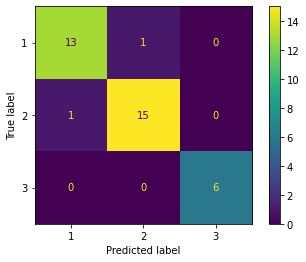

In [338]:
# Making the Confusion Matrix

#cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(Qclassifier, X_test, y_test)

In [339]:
# Compute the mean vector mu and the mean vector per class mu_k.Since the data has been standardized, the data means are zero

mu = np.mean(X_train,axis=0).values.reshape(11,1) # Mean vector mu
mu_k = []

for i, j in enumerate(np.unique(data['target'])):
    mu_k.append(np.mean(X_train.where(data['target']==j),axis=0))
mu_k = np.array(mu_k).T

In [355]:
mu

array([[-1.50583771e-15],
       [ 3.29841788e-16],
       [-2.65828048e-16],
       [-4.20438332e-16],
       [-2.13444286e-16],
       [-3.90923600e-17],
       [ 1.82952245e-16],
       [-2.57227729e-16],
       [ 1.57933134e-16],
       [ 1.70442690e-16],
       [-7.66210256e-17]])

In [356]:
mu_k

array([[ 9.19783533e-01, -8.94191083e-01,  1.85482156e-01],
       [-3.07458011e-01, -4.18026703e-01,  8.76835219e-01],
       [ 3.11704973e-01, -4.67485990e-01,  2.78214421e-01],
       [-7.70701276e-01,  2.21436129e-01,  5.35775485e-01],
       [ 3.57066698e-01, -2.92578328e-01,  5.66825020e-04],
       [ 9.42440356e-01, -7.47638140e-02, -9.11852530e-01],
       [ 1.08126971e+00,  3.13440641e-02, -1.19954906e+00],
       [-6.10910435e-01, -5.76725888e-02,  7.30070523e-01],
       [ 5.65705503e-01,  1.01131338e-01, -7.38546934e-01],
       [ 1.90231928e-01, -8.90969134e-01,  9.62925373e-01],
       [ 5.02353296e-01,  4.64384075e-01, -1.14635768e+00]])

In [340]:
#Compute the Scatter within and Scatter between matrices
# matrice de covarianta pentru fiecare clasa
data_SW = []
# vectorul de suma pentru fiecare clasa
Nc = []

for i, j in enumerate(np.unique(data['target'])):
    a = np.array(X_train.where(data['target']==j).dropna().values-mu_k[:,i].reshape(1,11))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(data['target']==j))
# suma matricelor de covarianta
# punctele din interiorulclaselor
SW = np.sum(data_SW,axis=0)
# punctele dintre clase
SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [341]:
#Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

In [342]:
#Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

In [343]:
#Transform the data with Y=X*w
Y = X_train.dot(w)

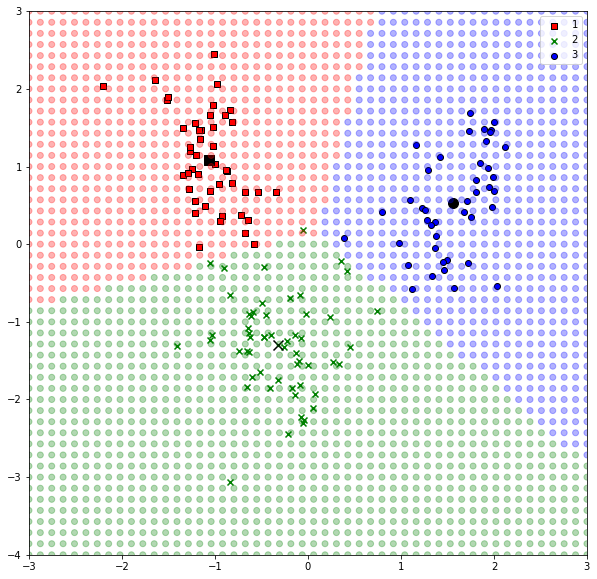

In [350]:
# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
    
means = []
for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
    mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3))     

mesh = []
for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))       
        
ax0.legend(loc='upper right')

NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)


plt.show()

In [351]:
# Linear Discriminant classifier

Lclassifier = LinearDiscriminantAnalysis()
Lclassifier.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [352]:
# Linear Discriminant classifier

print(accuracy_score(y_test,Lclassifier.predict(X_test)))

0.9166666666666666


In [353]:
y_predL = Lclassifier.predict(X_test)
y_predL

array([1, 3, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2])

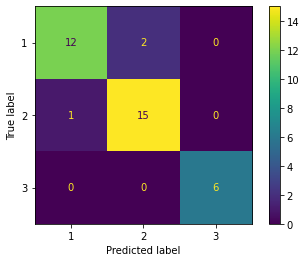

In [354]:
# Making the Confusion Matrix

#cm = confusion_matrix(y_test, y_predL)
plot_confusion_matrix(Lclassifier, X_test, y_test)